<img src="has.png" height="50" width="50">
<font color='red'>
<center>
    
# Project 2: TMDB Movies Data Analysis
</center>
</font>
<center>
    
### Hassan Al-Shehab
#### Udacity & Misk - Data Analyst


</center>


<a id='01'></a>


> This project to go through the dataset and the general data analysis process using numpy, pandas and matplotlib.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> An optional reason for (TMDB Movies) Data Analysis, because cinema is now present in Saudi Arabia as a new market. Knowing the outputs of exploring this data, it helps us to know the future direction of this market.

<a id='Q'></a>
## Questions:


#### Q1: Which movies have the highest and lowest budget?
#### Q2: Which movies have the highest and lowest profit?
#### Q3: Is movie profit increasing every year?
#### Q4: What are the most succesful genres?
#### Q5: Is there a relationship between profitability and popularity?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.xkcd()

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load TMDB Movies Dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# To show me the last row
df.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Show me number of columns and rows
df.shape

(10866, 21)

In [6]:
#Show me the types of the entries
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# To Check if there any duplicate in the rows.

sum(df.duplicated())

1

In [8]:
# Check is there any unique values
sum(df.nunique())

119205

In [9]:
# show me the description.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


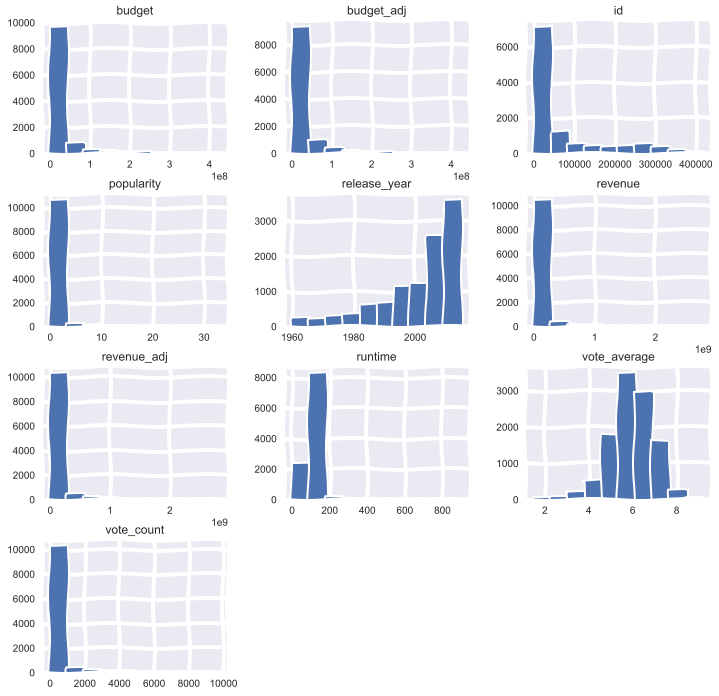

In [10]:
# Check histogram
plt.style.use('seaborn')
df.hist(figsize=(12,12));

In [11]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning

#### 1. Removing Duplicate Rows

In [12]:
# Drop duplicate
df.drop_duplicates(inplace=True)

sum(df.duplicated())

0

#### 2. Convert  Budget_adj and Revenue_adj with "0" values to NAN

In [13]:
# Convert Budget and Revenue with "0" values to NAN
df['budget_adj'] = df['budget_adj'].replace(0, np.NAN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NAN)

#### 3. Removing Columns No need

In [14]:
# Drop columns No need
df.drop(['homepage','tagline','keywords','cast','imdb_id','overview', 'runtime','release_date'], axis=1, inplace=True)

df.head(2)

,id,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


#### 4. Removing Null values

In [15]:
# check null's values
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [16]:
# Removing Null values
df.dropna(axis=0,how='any',inplace=True)
df.isnull().sum().any()

False

In [17]:
#Calculate the pofit
df.insert(4, 'profit', df['revenue_adj']-df['budget_adj'])

df.head()

,id,popularity,budget,revenue,profit,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,1.254446e+09,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,2.101614e+08,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,1.704191e+08,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,1.718723e+09,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,1.210949e+09,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Q1: Which movies have the highest and lowest budget?

In [18]:
# Define a 'calculate' function used to calculate highest and lowest values

def calculate(column):
    #for highest profit
    high = df[column].idxmax()
    high_det = pd.DataFrame(df.loc[high])
    
    #for lowest profit
    low = df[column].idxmin()
    low_det = pd.DataFrame(df.loc[low])
    
    #collectin
    collectin = pd.concat([high_det, low_det], axis=1)
    
    return collectin

calculate('budget_adj')

,2244,3581
id,46528,59296
popularity,0.25054,0.52043
budget,425000000,1
revenue,11087569,1378
profit,-4.13912e+08,1334.86
original_title,The Warrior's Way,"Love, Wedding, Marriage"
director,Sngmoo Lee,Dermot Mulroney
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,120dB Films|Scion Films|Voodoo Production Serv...
vote_count,74,55


>  (The Warrior's Way) had the greatest budget and (Love, Wedding, Marriage) had the lowest budget.

### Research Q2: Which movies have the highest and lowest profit?

In [19]:
calculate('profit')

,1329,2244
id,11,46528
popularity,12.0379,0.25054
budget,11000000,425000000
revenue,775398007,11087569
profit,2.75014e+09,-4.13912e+08
original_title,Star Wars,The Warrior's Way
director,George Lucas,Sngmoo Lee
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
vote_count,4428,74


>  (Star Wars) had the greatest profit and (The Warrior's Way) had the lowest profit.

### Research Q3: Is movie profit increasing every year?

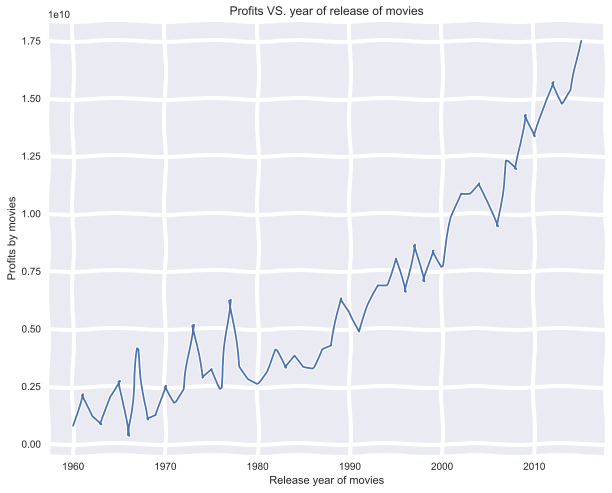

In [20]:
# profits of movies for every year
yp = df.groupby('release_year')['profit'].sum()
plt.style.use('seaborn')
plt.figure(figsize= (10, 8))
plt.plot(yp)
plt.xlabel('Release year of movies')
plt.ylabel('Profits by movies')
plt.title('Profits VS. year of release of movies');

> Chart Show us movie profits increasing every year.


### Research Q4: What are the most succesful genres?

In [21]:
# Extract movies that made more than or equal to 200 million dollars in profit

profit_data = df[df['profit'] >= 200000000]

#lets use the def function in order to separate our genres from '|' first and then use our prf

def data_sep(column):
    data_sep = profit_data[column].str.cat(sep = '|')
    data_sep = pd.Series(data_sep.split('|')) #giving pandas series and storing the values separately
    
    #lets arrange it in descending order
    
    count = data_sep.value_counts(ascending = False)
    
    return count

In [22]:
genre_count = data_sep('genres')
genre_count

Action             229
Adventure          227
Comedy             173
Drama              168
Thriller           161
Family             122
Fantasy            107
Science Fiction    106
Romance             76
Animation           75
Crime               66
Mystery             40
Horror              29
War                 23
Music               21
History             13
Western              9
dtype: int64

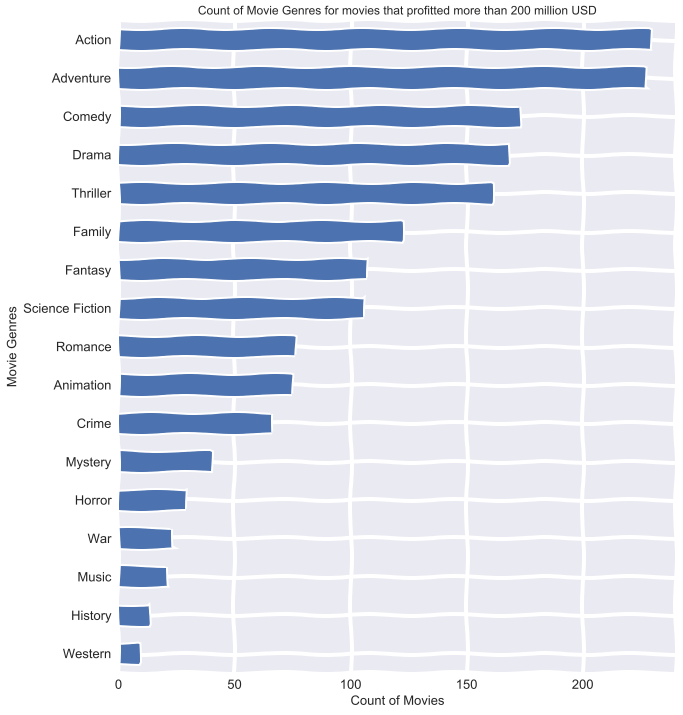

In [23]:
#lets plot the points in descending order top to bottom as we have data in same format.
genre_count.sort_values(ascending = True, inplace = True)
g = genre_count.plot.barh(fontsize = 13)

#title and axis labelling
g.set(title = 'Count of Movie Genres for movies that profitted more than 200 million USD')
g.set_xlabel('Count of Movies', fontsize = '13')
g.set_ylabel('Movie Genres', fontsize = '13')

#adjusting plot size
g.figure.set_size_inches(10, 12)
plt.show()

> Chart Show us the first 5 most succesful genres is Action, Adventure, Comedy, Drama and Thriller.

### Research Q5: Is there a relationship between profitability and popularity?

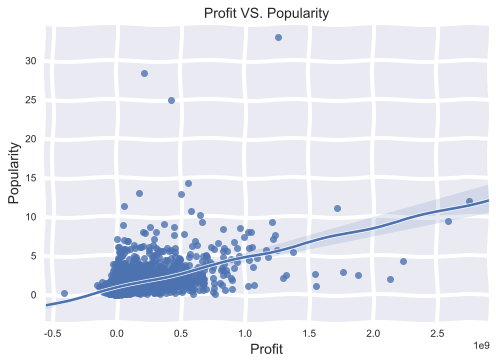

In [25]:
# a scatter plot using 'regplot' between 'profit' and 'popularity'
ax = sns.regplot(x=df['profit'], y=df['popularity'])

#set the title and labels of the figure
ax.set_title('Profit VS. Popularity',fontsize=14)
ax.set_xlabel('Profit',fontsize=14)
ax.set_ylabel('Popularity',fontsize=14)
#set the figure size
sns.set(rc={'figure.figsize':(10,7)})
plt.style.use('tableau-colorblind10')

> Observations from Profit  vs popularity  over years scatterplot:
Popularity is proportional to profit.

<a id='conclusions'></a>
## Conclusions

#### - (The Warrior's Way) had the greatest budget and (Love, Wedding, Marriage) had the lowest budget.
#### - (Star Wars) had the greatest profit and (The Warrior's Way) had the lowest profit.
#### - Movies profit increasing every year.
#### - First 5 most succesful genres is Action, Adventure, Comedy, Drama and Thriller.
#### - Popularity is proportional to profit.

<a id='limitations'></a>
## Limitations

###### - I believe the data was not exhaustive and the sample size (movie records) were not complete and we can argue that this analysis does not incorporate all the movies.
###### - In more than one column, we found many missing values. So in cleaning up our data, we decided to drop nulls. However, omitting the missing or null values of the variables that interest us may misrepresent our analysis and may show an unintended bias toward the relationship being analyzed.
###### - What I would like to say, is that the above conclusion does not mean that our analysis is 100% successful.
###### - I think that obtaining more accurate and clean data will give us results that will help me in determining the future of cinema in Saudi Arabia.

In [25]:
df.to_csv('tmdb-movies-edit.csv')